In [ ]:
import torch

# Check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available. Training on CPU...')
else:
    print('CUDA is available! Training on GPU...')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the root directory where LibriSpeech is stored. also loading a sample file.
librispeech_train = "/content/drive/My Drive/DL/DL_proj/LibriSpeech/train-clean-100/"
audio_path = "/content/drive/My Drive/DL/DL_proj/LibriSpeech/test-clean/121/121726/121-121726-0000.flac"


CUDA is not available. Training on CPU...
Mounted at /content/drive


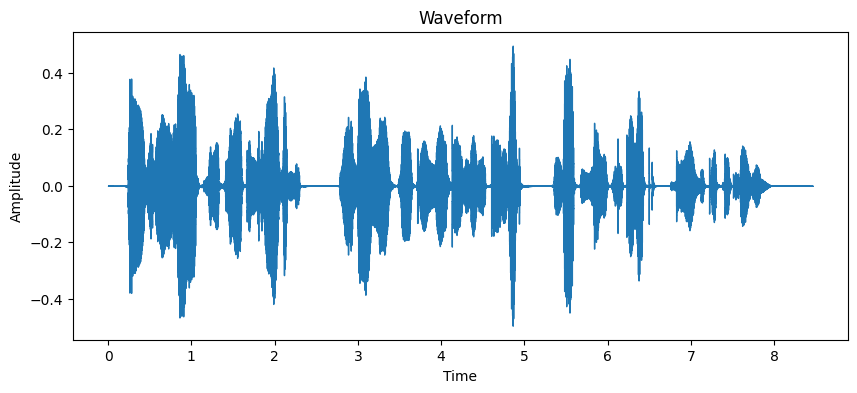

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the audio file
y, sr = librosa.load(audio_path)

# Plot the raw audio waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


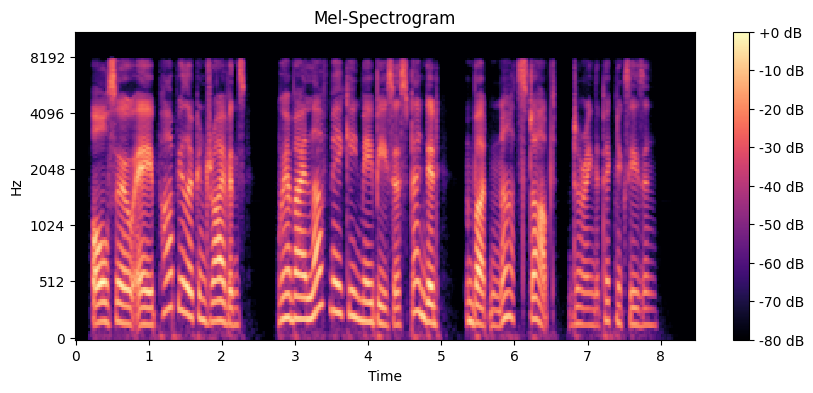

In [ ]:
# Compute mel-spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert power spectrogram to dB (decibel) units
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plot the mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.show()


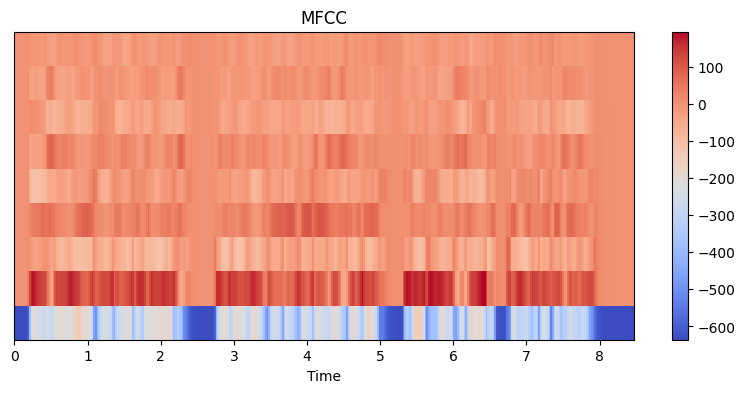

In [ ]:
# Compute MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=9)

# Plot the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()


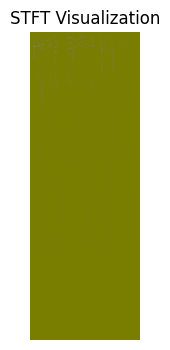

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load(audio_path)

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Separate real and imaginary parts
D_real = np.real(D)
D_imag = np.imag(D)

# Compute magnitude of STFT
magnitude = np.abs(D)

# Normalize each channel to [0, 1]
D_real_normalized = (D_real - D_real.min()) / (D_real.max() - D_real.min())
D_imag_normalized = (D_imag - D_imag.min()) / (D_imag.max() - D_imag.min())
magnitude_normalized = (magnitude - magnitude.min()) / (magnitude.max() - magnitude.min())

# Create the RGB image
rgb_image = np.stack((D_real_normalized, D_imag_normalized, magnitude_normalized), axis=-1)

# Plot the RGB image
plt.figure(figsize=(10, 4))
plt.imshow(rgb_image)
plt.title('STFT Visualization')
plt.axis('off')
plt.show()


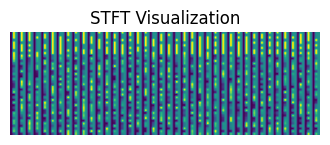

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
y, sr = librosa.load(audio_path)

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Separate magnitude and phase
magnitude = np.abs(D)
phase = np.angle(D)

# Normalize magnitude to [0, 1]
magnitude_normalized = (magnitude - magnitude.min()) / (magnitude.max() - magnitude.min())

# Normalize phase to [0, 2*pi] and map it to [0, 1]
phase_normalized = (phase + np.pi) / (2 * np.pi)

# Combine magnitude and phase into an RGB image
rgb_image = np.zeros((magnitude.shape[0], magnitude.shape[1], 3))
rgb_image[:, :, 0] = magnitude_normalized  # Red channel: Magnitude
rgb_image[:, :, 1] = phase_normalized      # Green channel: Phase
rgb_image[:, :, 2] = 0.5                   # Blue channel: Constant value (adjust as needed)
rgb_image.resize(40, 120)
# Plot the RGB image
plt.figure(figsize=(4, 4))
plt.imshow(rgb_image)
plt.title('STFT Visualization')
plt.axis('off')
plt.show()
